# Get predictions

In [14]:
import jsonlines
import pandas as pd
import os

In [6]:
NUM_EXP = 7

In [7]:
class Args(object):
    def __init__(self, adict):
        self.__dict__.update(adict)

In [8]:
LOG_PATH = '../../../data/raw/baselines/otgnn/output/exp_'+str(NUM_EXP)

In [22]:
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'
PREDS_COLUMN = 'logP_pred'

In [37]:
DATASET_OUTPUT_PATH = '../../../data/4_best_baselines_predictions/otgnn'

In [15]:
test_pred_list = []
with jsonlines.open(os.path.join(LOG_PATH,'run_0/','test_output.jsonl')) as reader:
    for obj in reader:
        test_pred_list.append(obj)

In [33]:
test_predictions = pd.DataFrame(test_pred_list)

In [34]:
test_predictions.head()

,smiles,label,pred
0,CC[C@]1(C)NC(=S)N2N1C(=S)N[C@@]2(C)CC,2.44,1.921057
1,O=c1[nH]cc(Cl)c(=O)[nH]1,-0.35,-0.272252
2,N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1,-0.55,-0.642856
3,CN(N=O)C(=O)Oc1cccc2ccccc12,2.85,2.912713
4,CC(C)CC(N)C(=O)NC(C(=O)NC(CC(C)C)C(=O)O)C(C)C,-1.57,-0.912706


In [35]:
test_predictions[VALUE_COLUMN] = test_predictions['label'] 
test_predictions[PREDS_COLUMN] = test_predictions['pred'] 
test_predictions = test_predictions.drop(columns = ['label','pred'], axis = 1)

In [36]:
test_predictions.head()

,smiles,logP,logP_pred
0,CC[C@]1(C)NC(=S)N2N1C(=S)N[C@@]2(C)CC,2.44,1.921057
1,O=c1[nH]cc(Cl)c(=O)[nH]1,-0.35,-0.272252
2,N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1,-0.55,-0.642856
3,CN(N=O)C(=O)Oc1cccc2ccccc12,2.85,2.912713
4,CC(C)CC(N)C(=O)NC(C(=O)NC(CC(C)C)C(=O)O)C(C)C,-1.57,-0.912706


In [40]:
test_predictions.to_csv(os.path.join(DATASET_OUTPUT_PATH, 'logp_wo_averaging_test_preds.csv'), index = False)

# Get worst/best molecules

In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

In [51]:
ERROR_COLUMN = 'Absolute Error'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'
PREDS_COLUMN = 'logP_pred'

DATASET_INPUT_PATH = '../../../data/4_best_baselines_predictions/otgnn'

DATASET_OUTPUT_PATH = '../../../data/raw/baselines/otgnn'

In [46]:
test_predictions = pd.read_csv(os.path.join(DATASET_INPUT_PATH, 'logp_wo_averaging_test_preds.csv'))

In [47]:
test_predictions[ERROR_COLUMN] = np.abs(test_predictions[VALUE_COLUMN]-test_predictions[PREDS_COLUMN])

In [48]:
test_predictions

,smiles,logP,logP_pred,Absolute Error
0,CC[C@]1(C)NC(=S)N2N1C(=S)N[C@@]2(C)CC,2.44,1.921057,0.518943
1,O=c1[nH]cc(Cl)c(=O)[nH]1,-0.35,-0.272252,0.077748
2,N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1,-0.55,-0.642856,0.092856
3,CN(N=O)C(=O)Oc1cccc2ccccc12,2.85,2.912713,0.062713
4,CC(C)CC(N)C(=O)NC(C(=O)NC(CC(C)C)C(=O)O)C(C)C,-1.57,-0.912706,0.657294
...,...,...,...,...
2044,CNCC(=O)O,-2.78,-2.144758,0.635242
2045,COC(=O)C(C#N)=Cc1ccco1,1.65,1.594962,0.055038
2046,O=C(O)CCCCCn1nnc2ccccc21,0.86,0.962121,0.102121
2047,Cc1cc(Br)cc(C(=O)NC(C)C)c1O,4.19,3.705265,0.484735


In [49]:
test_predictions = test_predictions.sort_values(by=ERROR_COLUMN)

In [50]:
test_predictions

,smiles,logP,logP_pred,Absolute Error
1114,CCOC(=O)C(Cc1ccc(Cl)cc1)=NC=O,2.65,2.649828,0.000172
961,Nc1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2,1.00,1.000189,0.000189
1095,CC(C)(C)c1ccc2c(c1)OCCOCCOCCOCCO2,2.26,2.259343,0.000657
1904,O=c1[nH]c2c(O)ccc(CCNCCSCCCOCCc3ccccc3)c2s1,2.86,2.860751,0.000751
1801,O=C(O)COc1ccc2ccccc2c1,2.53,2.528989,0.001011
...,...,...,...,...
1645,CN(CCO)c1nc(=Nc2ccc(C=Cc3ccc(N=c4[nH]c(N(C)CCO...,1.20,-1.828203,3.028203
330,N=C(N=NCc1ccc2ccccc2n1)Nc1ccccc1,0.99,4.136282,3.146282
897,CCCCCOC(=O)CCCNC(=O)NC12CC3CC(CC(C3)C1)C2,0.44,3.762536,3.322536
1463,CN(C)C(=S)S[Fe](SC(=S)N(C)C)SC(=S)N(C)C,-1.60,1.988895,3.588895


In [52]:
test_predictions.to_csv(os.path.join(DATASET_OUTPUT_PATH,'predictions_table.csv'), index = False)

## Draw best molecules

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
ERROR_COLUMN = 'Absolute Error'
SMILES_COLUMN = 'smiles'
VALUE_COLUMN = 'logP'
PREDS_COLUMN = 'logP_pred'

DATA_PATH = '../../../data/raw/baselines/otgnn'

In [3]:
test_predictions = pd.read_csv(os.path.join(DATA_PATH,'predictions_table.csv'))

In [44]:
sorted_smiles = test_predictions[SMILES_COLUMN].values

In [45]:
NUMBER_OF_BEST = 100
NUMBER_OF_WORST = 100

In [46]:
best_pred_smiles = sorted_smiles[:NUMBER_OF_BEST]
worst_pred_smiles = sorted_smiles[-NUMBER_OF_WORST:]

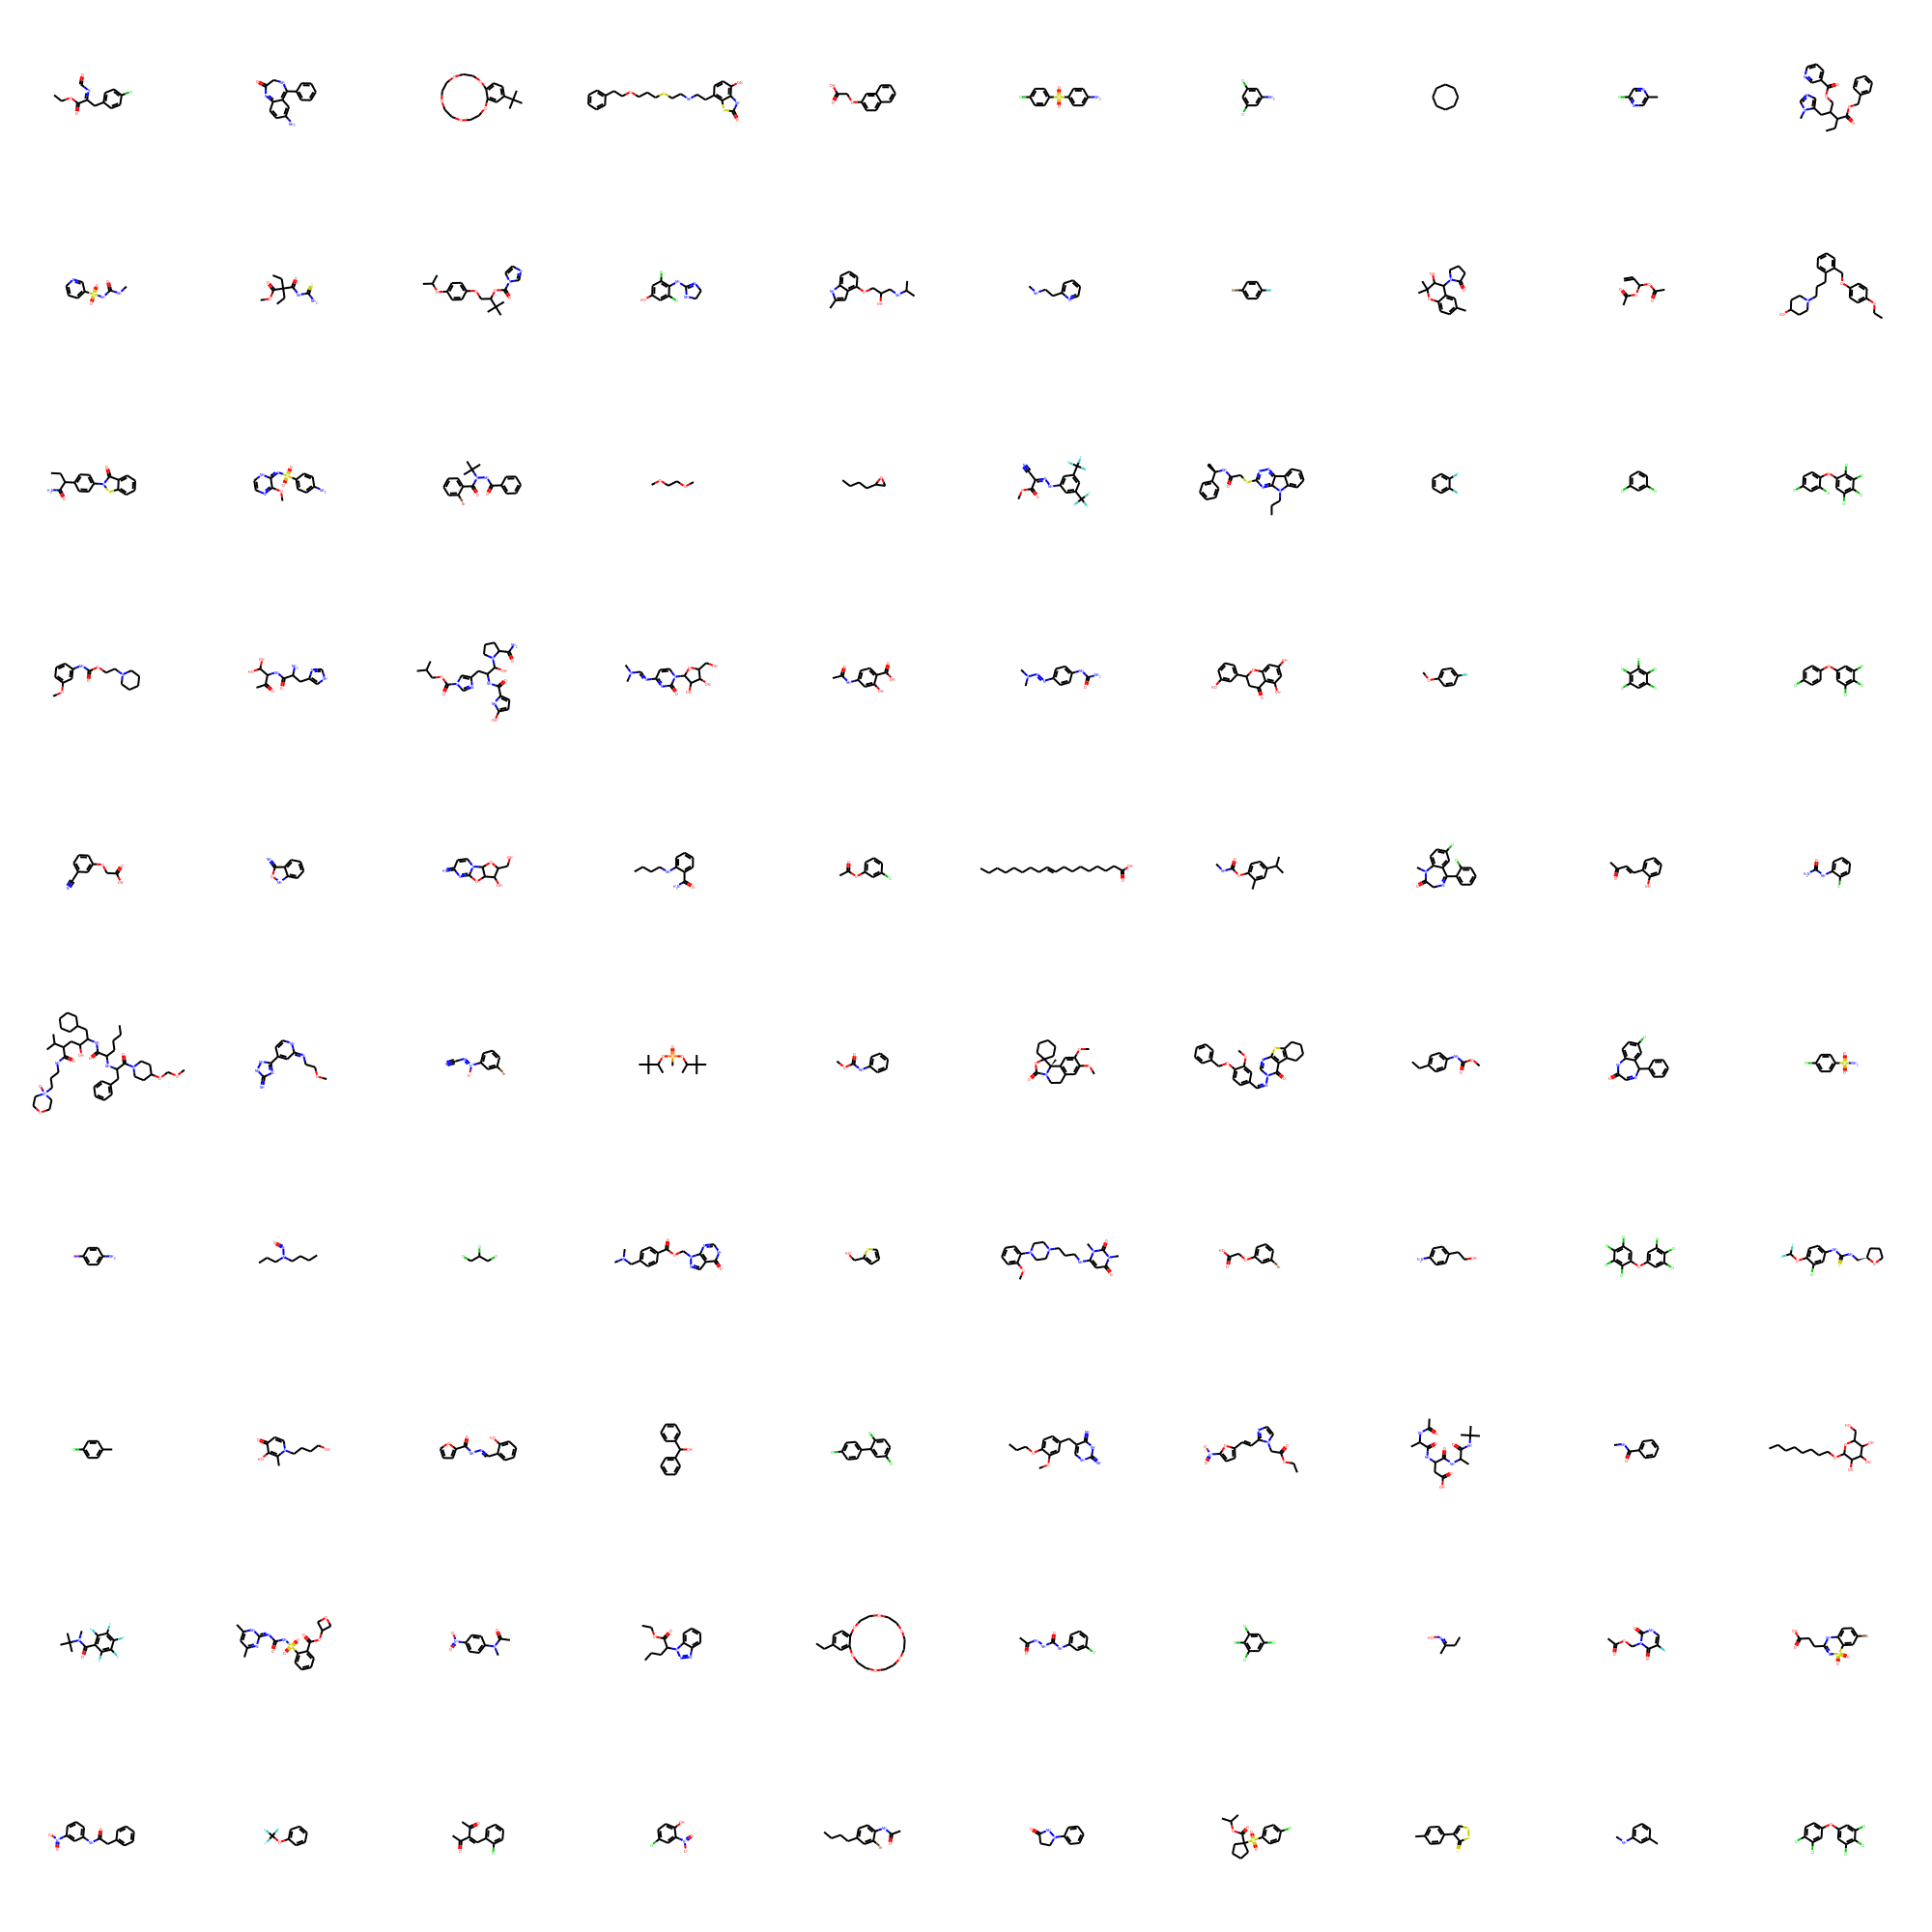

In [14]:
ms = [Chem.MolFromSmiles(smiles) for smiles in best_pred_smiles]
img=Draw.MolsToGridImage(ms,molsPerRow=10,subImgSize=(200,200))#,legends=[smiles for smiles in best_pred_smiles])    
img.save('../../../../OTGNN_best_preds_lq.png')
img

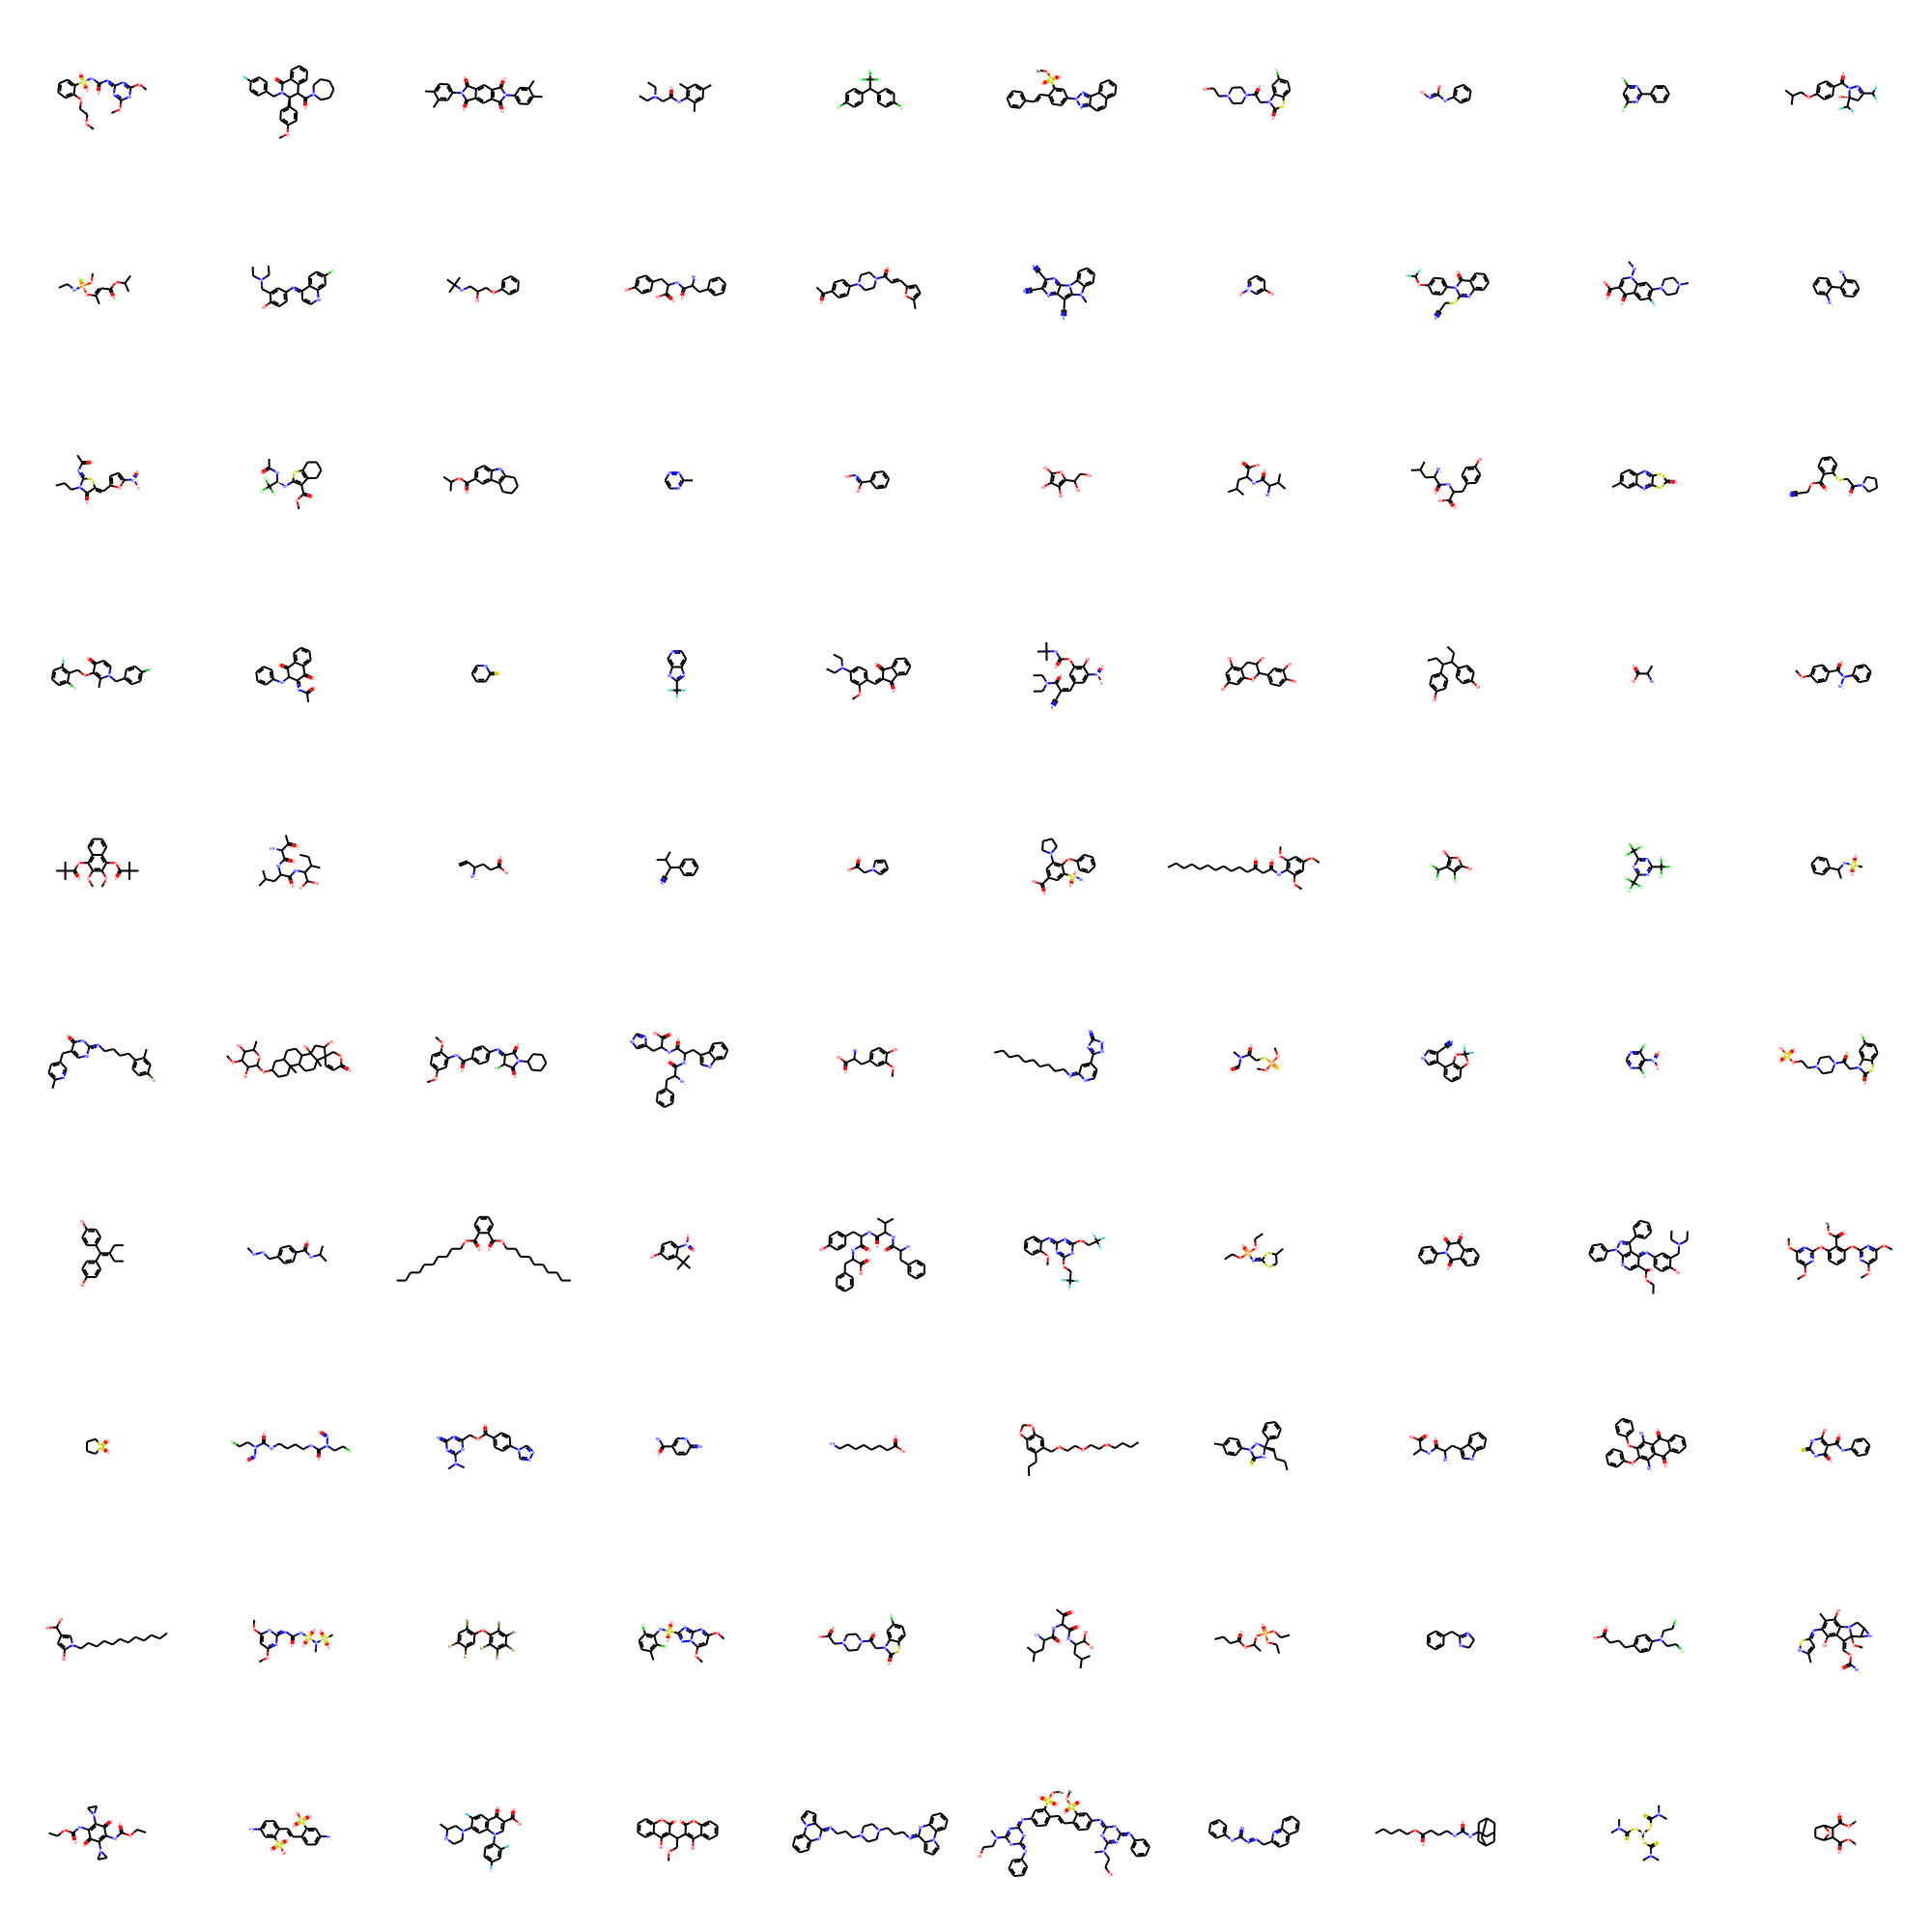

In [15]:
ms = [Chem.MolFromSmiles(smiles) for smiles in worst_pred_smiles]
img=Draw.MolsToGridImage(ms,molsPerRow=10,subImgSize=(200,200))#,legends=[smiles for smiles in worst_pred_smiles])    
img.save('../../../../OTGNN_worst_preds_lq.png')
img

### Get statistics

In [4]:
from scipy import stats
import seaborn as sns

In [5]:
def create_statistics(vals):
    values = vals.copy()
    mols = [Chem.MolFromSmiles(x) for x in values.smiles]
    
    atom_count = [mol.GetNumAtoms() for mol in mols]
    values['atom_count'] = pd.Series(atom_count)
    
    values['ring_count'] = pd.Series([mol.GetRingInfo().NumRings() for mol in mols])
    
    mol_atoms = [mol.GetAtoms() for mol in mols]
    non_simple_atom_count = [sum((num.GetAtomicNum() not in [1, 6, 8, 7]) for num in m_atoms) for m_atoms in mol_atoms]
    values['non_organogens_count'] = pd.Series(non_simple_atom_count)
    
    values['non_organogens_percent'] = values.non_organogens_count / values.atom_count *100
    
    benzene_smiles = 'C1=CC=CC=C1'
    pattern = Chem.MolFromSmiles(benzene_smiles)
    values['aromatic_count'] = pd.Series([len(mol.GetSubstructMatches(pattern)) for mol in mols])
    
    values['aromatic_rings_percent'] = values.aromatic_count / values.ring_count *100
    values['aromatic_rings_percent'] = values['aromatic_rings_percent'].fillna(0)
    
    values['bond_count'] =  [len(mol.GetBonds()) for mol in mols]
    values['aromatic_bond_count'] = [sum(bond.GetIsAromatic() for bond in mol.GetBonds()) for mol in mols]
    values['aromatic_bond_percent'] = values.aromatic_bond_count / values.bond_count * 100
    
    values_list = [pd.Series(Chem.CanonicalRankAtoms(mol, breakTies=False)).value_counts() for mol in mols]
    values['is_symmetric'] =  [len(values) == len(values[values % 2 == 0]) for values in values_list]
    
    return values

In [10]:
compare_data_with_stats = create_statistics(test_predictions)

In [50]:
compare_data_with_stats

,smiles,logP,logP_pred,Absolute Error,atom_count,ring_count,non_organogens_count,non_organogens_percent,aromatic_count,aromatic_rings_percent,bond_count,aromatic_bond_count,aromatic_bond_percent,is_symmetric
0,CCOC(=O)C(Cc1ccc(Cl)cc1)=NC=O,2.65,2.649828,0.000172,17,1,1,5.882353,1,100.000000,17,6,35.294118,False
1,Nc1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2,1.00,1.000189,0.000189,19,3,0,0.000000,2,66.666667,21,12,57.142857,False
2,CC(C)(C)c1ccc2c(c1)OCCOCCOCCOCCO2,2.26,2.259343,0.000657,23,2,0,0.000000,1,50.000000,24,6,25.000000,False
3,O=c1[nH]c2c(O)ccc(CCNCCSCCCOCCc3ccccc3)c2s1,2.86,2.860751,0.000751,29,3,2,6.896552,2,66.666667,31,16,51.612903,False
4,O=C(O)COc1ccc2ccccc2c1,2.53,2.528989,0.001011,15,2,0,0.000000,2,100.000000,16,11,68.750000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,CN(CCO)c1nc(=Nc2ccc(C=Cc3ccc(N=c4[nH]c(N(C)CCO...,1.20,-1.828203,3.028203,62,6,4,6.451613,4,66.666667,67,36,53.731343,False
2045,N=C(N=NCc1ccc2ccccc2n1)Nc1ccccc1,0.99,4.136282,3.146282,22,3,0,0.000000,2,66.666667,24,17,70.833333,False
2046,CCCCCOC(=O)CCCNC(=O)NC12CC3CC(CC(C3)C1)C2,0.44,3.762536,3.322536,25,4,0,0.000000,0,0.000000,27,0,0.000000,False
2047,CN(C)C(=S)S[Fe](SC(=S)N(C)C)SC(=S)N(C)C,-1.60,1.988895,3.588895,19,0,7,36.842105,0,0.000000,18,0,0.000000,False


In [51]:
best, middle, worst = np.array_split(compare_data_with_stats, 3)
middle = middle.reset_index()
worst = worst.reset_index()

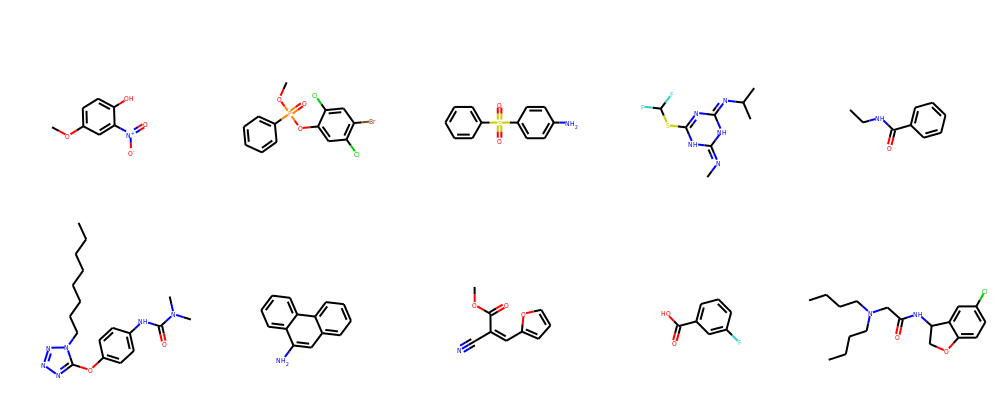

In [52]:
# Look through random 10 molecules from "best part"
ms = [Chem.MolFromSmiles(smiles) for smiles in best.sample(10).smiles]
img=Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(200,200))#,legends=[smiles for smiles in worst_pred_smiles])    
img


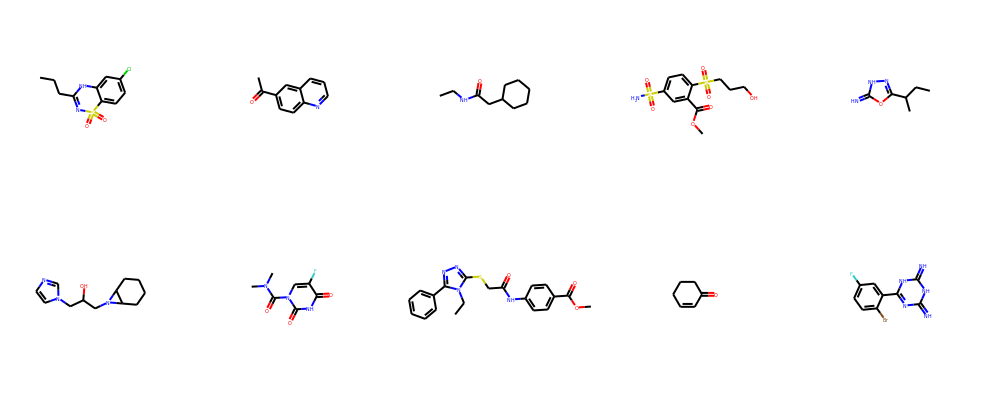

In [53]:
# Look through random 10 molecules from "middle part"
ms = [Chem.MolFromSmiles(smiles) for smiles in middle.sample(10).smiles]
img=Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(200,200))#,legends=[smiles for smiles in worst_pred_smiles])    
img

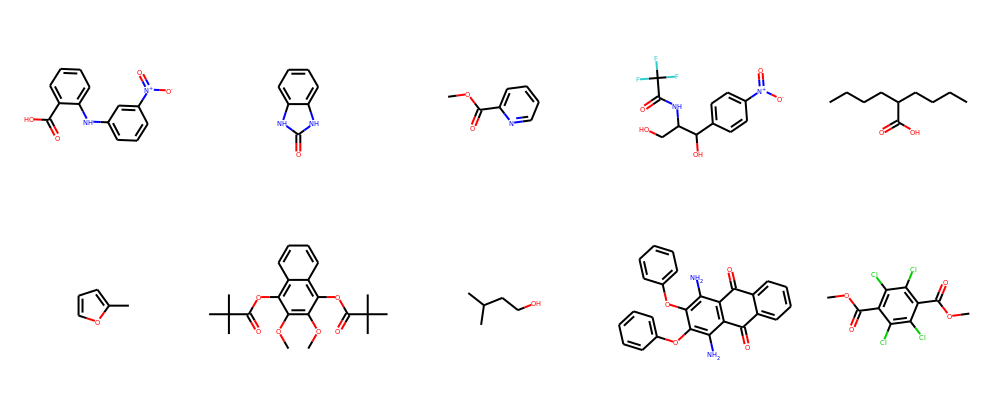

In [54]:
# Look through random 10 molecules from "worst part"
ms = [Chem.MolFromSmiles(smiles) for smiles in worst.sample(10).smiles]
img=Draw.MolsToGridImage(ms,molsPerRow=5,subImgSize=(200,200))#,legends=[smiles for smiles in worst_pred_smiles])    
img

In [55]:
NUMBER_OF_BEST = 200
NUMBER_OF_WORST = 200

In [56]:
best_n_vals = compare_data_with_stats.iloc[:NUMBER_OF_BEST]

In [57]:
worst_n_vals = compare_data_with_stats.iloc[-NUMBER_OF_WORST:].sort_values(by=ERROR_COLUMN, ascending = False)

### Check atom_count influence

In [27]:
print(stats.kruskal(best_n_vals.atom_count, worst_n_vals.atom_count))

KruskalResult(statistic=39.12141448146295, pvalue=3.9825171682784264e-10)


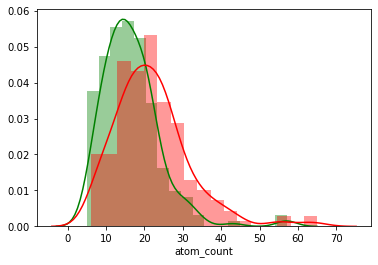

In [28]:
sns.distplot(best_n_vals.atom_count, color='g')
sns.distplot(worst_n_vals.atom_count, color='r')

### Check ring_count influence

In [29]:
print(stats.kruskal(best_n_vals.ring_count, worst_n_vals.ring_count))

KruskalResult(statistic=10.66682162773105, pvalue=0.0010907437937050463)


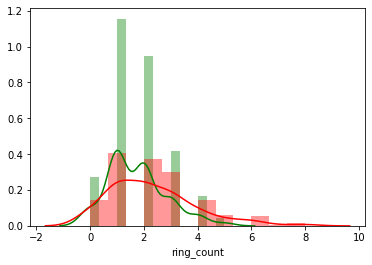

In [84]:
sns.distplot(best_n_vals.ring_count, color='g')
sns.distplot(worst_n_vals.ring_count, color='r')

### Check non_organogens_count influence

In [30]:
print(stats.kruskal(best_n_vals.non_organogens_count, worst_n_vals.non_organogens_count))

KruskalResult(statistic=0.008922681868740713, pvalue=0.9247437966165478)


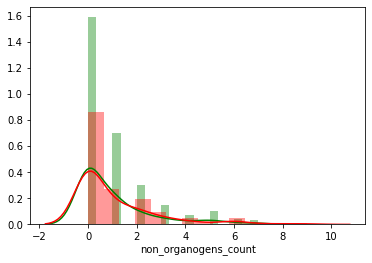

In [31]:
sns.distplot(best_n_vals.non_organogens_count, color='g')
sns.distplot(worst_n_vals.non_organogens_count, color='r')

### Check non_organogens_percent influence

In [88]:
print(stats.ttest_ind(best_n_vals.non_organogens_percent, worst_n_vals.non_organogens_percent))

Ttest_indResult(statistic=1.3859375342390576, pvalue=0.16654200551335233)


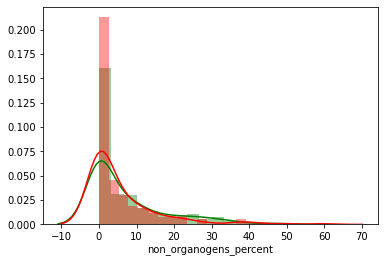

In [89]:
sns.distplot(best_n_vals.non_organogens_percent, color='g')
sns.distplot(worst_n_vals.non_organogens_percent, color='r')

### Check aromatic_count influence

In [32]:
print(stats.kruskal(best_n_vals.aromatic_count, worst_n_vals.aromatic_count))

KruskalResult(statistic=0.028440561719040743, pvalue=0.8660772219835998)


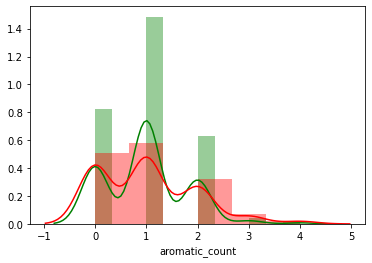

In [33]:
sns.distplot(best_n_vals.aromatic_count, color='g')
sns.distplot(worst_n_vals.aromatic_count, color='r')

### Check aromatic_rings_percent influence

In [34]:
print(stats.kruskal(best_n_vals.aromatic_rings_percent, worst_n_vals.aromatic_rings_percent))

KruskalResult(statistic=6.333755246254028, pvalue=0.011846122559573232)


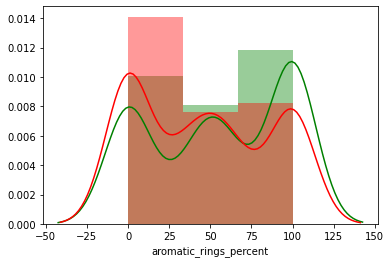

In [93]:
sns.distplot(best_n_vals.aromatic_rings_percent, color='g')
sns.distplot(worst_n_vals.aromatic_rings_percent, color='r')

### Check aromatic bond percent

In [35]:
print(stats.kruskal(best_n_vals.aromatic_bond_percent, worst_n_vals.aromatic_bond_percent))

KruskalResult(statistic=10.3465576096649, pvalue=0.0012971636259131454)


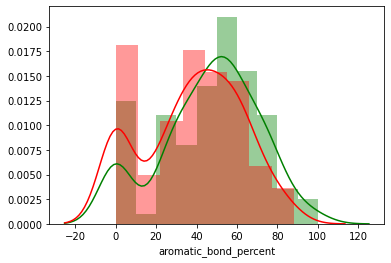

In [95]:
sns.distplot(best_n_vals.aromatic_bond_percent, color='g')
sns.distplot(worst_n_vals.aromatic_bond_percent, color='r')

### Check aromatic bond count

In [36]:
print(stats.kruskal(best_n_vals.aromatic_bond_count, worst_n_vals.aromatic_bond_count))

KruskalResult(statistic=0.4068778391342502, pvalue=0.5235584598174365)


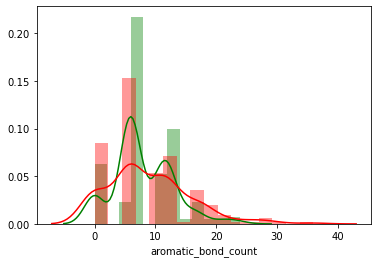

In [97]:
sns.distplot(best_n_vals.aromatic_bond_count, color='g')
sns.distplot(worst_n_vals.aromatic_bond_count, color='r')


### Symmetry analysis

In [11]:
symmetric_rull = lambda values: (len(values) - 1 <= len(values[values % 2 == 0])) or (len(values) - 1 <= len(values[(values % 2 == 1) & (values > 1)]))

In [12]:
values_list = [pd.Series(Chem.CanonicalRankAtoms(Chem.MolFromSmiles(smiles), breakTies=False)).value_counts() for smiles in compare_data_with_stats[SMILES_COLUMN]]
symmetric_indices = [symmetric_rull(values) for values in values_list]
not_symmetric_indices = [not e for e in symmetric_indices]

In [13]:
symmetric_y_predicted = compare_data_with_stats[PREDS_COLUMN][symmetric_indices]

In [14]:
symmetric_y_expected = compare_data_with_stats[VALUE_COLUMN][symmetric_indices]

In [15]:
not_symmetric_y_predicted = compare_data_with_stats[PREDS_COLUMN][not_symmetric_indices]

In [16]:
not_symmetric_y_expected = compare_data_with_stats[VALUE_COLUMN][not_symmetric_indices]

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [20]:
print("Test symmetric RMSE =", mean_squared_error(symmetric_y_expected, symmetric_y_predicted, squared=False))
print("Test symmetric R2-score is {0}".format(r2_score(symmetric_y_expected, symmetric_y_predicted)))

Test symmetric RMSE = 0.889968679029807
Test symmetric R2-score is 0.8414995534372036


In [21]:
print("Test not symmetric RMSE =", mean_squared_error(not_symmetric_y_expected, not_symmetric_y_predicted, squared=False))
print("Test not symmetric R2-score is {0}".format(r2_score(not_symmetric_y_expected, not_symmetric_y_predicted)))

Test not symmetric RMSE = 0.45546785575727816
Test not symmetric R2-score is 0.9381458290091959
